In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv("airline_passenger_satisfaction.csv")
df.head()

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
import boto3
import sagemaker
from sagemaker import get_execution_role
from sklearn.model_selection import train_test_split

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


In [4]:
sm_boto3=boto3.client("sagemaker")
sess= sagemaker.Session()

In [5]:
region= sess.boto_session.region_name
BUCKET_URI= "s3://project1-buck1"
BUCKET_NAME= "project1-buck1"
DATASET_PATH= f"{BUCKET_URI}/airline_passenger_satisfaction.csv"
TARGET_NAME="satisfaction"

In [6]:
airlines= pd.read_csv(DATASET_PATH)

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/fsspec/registry.py:279: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


In [7]:
airlines.head()

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [8]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   customer_type                      129880 non-null  object 
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  object 
 5   customer_class                     129880 non-null  object 
 6   flight_distance                    129880 non-null  int64  
 7   inflight_wifi_service              129880 non-null  int64  
 8   departure_arrival_time_convenient  129880 non-null  int64  
 9   ease_of_online_booking             129880 non-null  int64  
 10  gate_location                      129880 non-null  int64  
 11  food_and_drink                     1298

In [9]:
airlines.isnull().sum()

Unnamed: 0                             0
Gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
customer_class                         0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
satisfaction                           0
dtype: int64

In [10]:
airlines.describe()

,Unnamed: 0,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,64939.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32469.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64939.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97409.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129879.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [11]:
## fill median values in missinng arrival delay
airlines.arrival_delay_in_minutes.fillna(airlines.arrival_delay_in_minutes.median(),inplace=True)
airlines.isnull().sum()

/tmp/ipykernel_7433/1738215397.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airlines.arrival_delay_in_minutes.fillna(airlines.arrival_delay_in_minutes.median(),inplace=True)


Unnamed: 0                           0
Gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
customer_class                       0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64

In [12]:
## convert catogerical column into numerical using one hot encoding
airlines["Gender"]=airlines["Gender"].map({"Male":0,"Female":1})
airlines["customer_type"]=airlines["customer_type"].map({"Loyal Customer":0,"disloyal Customer":1})
airlines["type_of_travel"]=airlines["type_of_travel"].map({"Personal Travel":0,"Business travel":1})
airlines["customer_class"]=airlines["customer_class"].map({"Business":0,"Eco Plus":1,"Eco":2})



In [13]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   Gender                             129880 non-null  int64  
 2   customer_type                      129880 non-null  int64  
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  int64  
 5   customer_class                     129880 non-null  int64  
 6   flight_distance                    129880 non-null  int64  
 7   inflight_wifi_service              129880 non-null  int64  
 8   departure_arrival_time_convenient  129880 non-null  int64  
 9   ease_of_online_booking             129880 non-null  int64  
 10  gate_location                      129880 non-null  int64  
 11  food_and_drink                     1298

Matplotlib is building the font cache; this may take a moment.


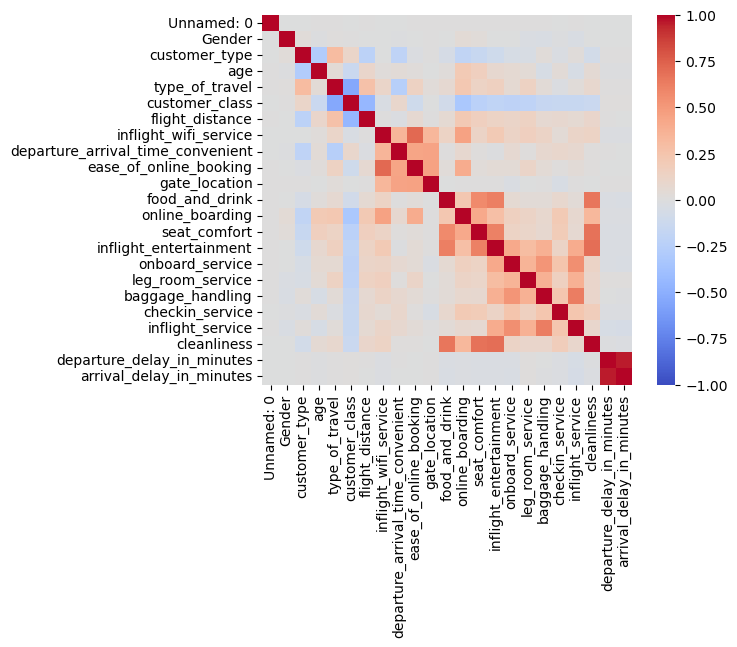

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation= airlines.corr(numeric_only=True)
sns.heatmap(correlation, center=0, square=True, cmap="coolwarm", vmin= -1, vmax=1)
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
df= airlines.copy(deep=True)
le= LabelEncoder()
df[TARGET_NAME]=le.fit_transform(df[TARGET_NAME])

In [16]:
from sklearn.model_selection import train_test_split
train, test= train_test_split(df,random_state=1, test_size=0.2)

In [17]:
train.to_csv("airlines-train.csv")
test.to_csv("airlines-test.csv")

In [18]:
trainpath=sess.upload_data(path="airlines-train.csv", bucket= BUCKET_NAME, key_prefix= "sagemaker/sklearncontainer")
testpath=sess.upload_data(path="airlines-test.csv", bucket= BUCKET_NAME, key_prefix= "sagemaker/sklearncontainer")

In [19]:
# We use the Estimator from the SageMaker Python SDK
from sagemaker.sklearn.estimator import SKLearn
FRAMEWORK_VERSION = "0.23-1"

sklearn_estimator = SKLearn(
   entry_point="script.py",
   role=get_execution_role(),
   instance_count=1,
   instance_type="ml.c5.xlarge",
   framework_version=FRAMEWORK_VERSION,
   base_job_name="rf-scikit",
   hyperparameters={
       "n-estimators": 100,
       "min-samples-leaf": 3,
   },
)

In [20]:
sklearn_estimator.fit({"train":trainpath, "test": testpath}, wait=True)

INFO:sagemaker:Creating training-job with name: rf-scikit-2024-07-30-00-47-21-053


2024-07-30 00:47:21 Starting - Starting the training job...
2024-07-30 00:47:35 Starting - Preparing the instances for training...
2024-07-30 00:48:00 Downloading - Downloading input data...
2024-07-30 00:48:45 Training - Training image download completed. Training in progress..2024-07-30 00:48:49,469 sagemaker-containers INFO     Imported framework sagemaker_sklearn_container.training
2024-07-30 00:48:49,472 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2024-07-30 00:48:49,513 sagemaker_sklearn_container.training INFO     Invoking user training script.
2024-07-30 00:48:49,655 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2024-07-30 00:48:49,666 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2024-07-30 00:48:49,677 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2024-07-30 00:48:49,684 sagemaker-training-toolkit INFO     Invoking user script
T

In [21]:
# We use the Estimator from the SageMaker Python SDK


spot_sklearn_estimator = SKLearn(
   entry_point="script.py",
   role=get_execution_role(),
   instance_count=1,
   instance_type="ml.c5.xlarge",
   framework_version=FRAMEWORK_VERSION,
   base_job_name="rf-scikit",
   hyperparameters={
       "n-estimators": 100,
       "min-samples-leaf": 3,
   },
    use_spot_instances=True,
    max_wait=7200, 
    max_run=3600
)

In [22]:
spot_sklearn_estimator.fit({"train":trainpath, "test": testpath}, wait=True)

INFO:sagemaker:Creating training-job with name: rf-scikit-2024-07-30-00-49-33-511


2024-07-30 00:49:34 Starting - Starting the training job...
2024-07-30 00:49:48 Starting - Preparing the instances for training...
2024-07-30 00:50:16 Downloading - Downloading input data...
2024-07-30 00:51:02 Training - Training image download completed. Training in progress...2024-07-30 00:51:07,337 sagemaker-containers INFO     Imported framework sagemaker_sklearn_container.training
2024-07-30 00:51:07,340 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2024-07-30 00:51:07,376 sagemaker_sklearn_container.training INFO     Invoking user training script.
2024-07-30 00:51:07,556 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2024-07-30 00:51:07,566 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2024-07-30 00:51:07,577 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2024-07-30 00:51:07,585 sagemaker-training-toolkit INFO     Invoking user script


In [23]:
from sagemaker.tuner import IntegerParameter
hyperparameter_ranges={  "n-estimators": IntegerParameter(20,100),
       "min-samples-leaf": IntegerParameter(2,6),}

In [24]:
##Create Optimizer
Optimizer = sagemaker.tuner.HyperparameterTuner(
   estimator=sklearn_estimator,
   hyperparameter_ranges=hyperparameter_ranges,
   base_tuning_job_name="RF-tuner",
   objective_type="Maximize",
   objective_metric_name="balanced-accuracy",
   metric_definitions=[
       {"Name": "balanced-accuracy", "Regex": "Test balanced accuracy: ([0-9.]+).*$"}
   ],  # Extract tracked metric from logs with regexp
   max_jobs=10,
   max_parallel_jobs=2,
)

In [25]:
Optimizer.fit({"train":trainpath, "test": testpath})

INFO:sagemaker:Creating hyperparameter tuning job with name: RF-tuner-240730-0051


.............................................................!


In [26]:
results=Optimizer.analytics().dataframe()
while results.empty:
    time.sleep(1)
    results=Optimizer.analytics().dataframe()

results.head()

,min-samples-leaf,n-estimators,TrainingJobName,TrainingJobStatus,FinalObjectiveValue,TrainingStartTime,TrainingEndTime,TrainingElapsedTimeSeconds
0,4.0,100.0,RF-tuner-240730-0051-010-2fd76e06,Completed,0.958,2024-07-30 00:56:19+00:00,2024-07-30 00:56:53+00:00,34.0
1,6.0,96.0,RF-tuner-240730-0051-009-e44ffbc1,Completed,0.956,2024-07-30 00:56:10+00:00,2024-07-30 00:56:44+00:00,34.0
2,3.0,97.0,RF-tuner-240730-0051-008-64bb24d4,Completed,0.959,2024-07-30 00:55:29+00:00,2024-07-30 00:56:03+00:00,34.0
3,3.0,100.0,RF-tuner-240730-0051-007-b09b7fed,Completed,0.960,2024-07-30 00:55:22+00:00,2024-07-30 00:55:56+00:00,34.0
4,3.0,31.0,RF-tuner-240730-0051-006-45db7e0d,Completed,0.959,2024-07-30 00:54:43+00:00,2024-07-30 00:55:14+00:00,31.0


In [27]:
best_estimator= Optimizer.best_estimator()


2024-07-30 00:55:21 Starting - Found matching resource for reuse
2024-07-30 00:55:21 Downloading - Downloading the training image
2024-07-30 00:55:21 Training - Training image download completed. Training in progress.
2024-07-30 00:55:21 Uploading - Uploading generated training model
2024-07-30 00:55:21 Completed - Resource reused by training job: RF-tuner-240730-0051-007-b09b7fed


In [29]:
artifact_path = sm_boto3.describe_training_job(
   TrainingJobName=best_estimator.latest_training_job.name
)["ModelArtifacts"]["S3ModelArtifacts"]

print("Model artifact persisted at " + artifact_path)

Model artifact persisted at s3://sagemaker-us-east-2-010438462960/RF-tuner-240730-0051-005-91c97a04/output/model.tar.gz


In [30]:
from sagemaker.sklearn.model import SKLearnModel

model = SKLearnModel(
   model_data=artifact_path,
   role=get_execution_role(),
   entry_point="script.py",
   framework_version=FRAMEWORK_VERSION,
)


In [ ]:
predictor = model.deploy(instance_type="ml.c5.xlarge", initial_instance_count=1)

preds = predictor.predict(test.sample(4).drop("satisfaction", axis=1))
preds